# Confusion Matrix
#### Importation of resources:

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

from sklearn.model_selection import learning_curve, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

seed = 123


#### Loading the iris dataset and storing the appropriate values for X and y in their corresponding variables before splitting the dataset 80% as training data and the other 20% as testing data.

In [19]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#### Creating a pipeline which firstly normalises the data, then applies PCA with 2 components to the dataset before finally applying the SVM classifier to the dimensionality reduced sub-space

In [37]:
svm_pipe = make_pipeline(MinMaxScaler(),
                    PCA(n_components=2),
                    SVC(random_state=seed))

#### Training of the model using both X_train and y_train before using the trained model to predict the y_test given the X_test values. This prediction is then compared with the expected value, y_test. 
+ yPrediction = the labels predicted by the classifier when it is passed the X_test values
+ confusionMat = the confusion matrix which compares the predicted values with the expected values

In [21]:
svm_pipe.fit(X_train,y_train)
yPrediction = svm_pipe.predict(X_test)
confusionMat = confusion_matrix(y_test, yPrediction)
print(confusionMat)

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


#### The results are then outputted in the format of a confusion matrix

Text(69.0, 0.5, 'Expected')

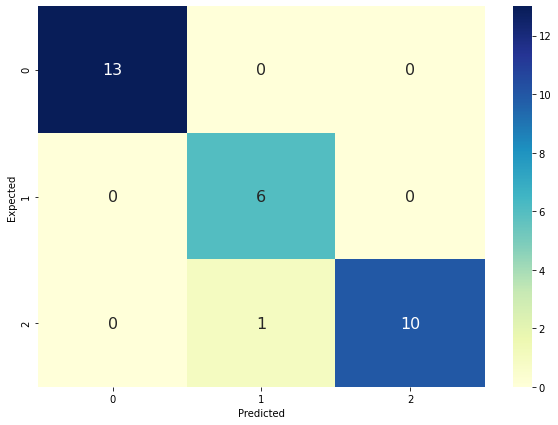

In [26]:
df_cm = pd.DataFrame(confusionMat)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Expected")